<img src="Logo Biwiser.jpeg">

# 2° Evaluación Curso Introducción a Python Academia Biwiser

## Instrucciones:
1. Las respuestas deben responderse dentro de este mismo Jupyter Notebook, el cual deberá cargar en módulo de la evaluación antes del domingo a las 18:30 horas. Se pide favor hacer tambien el envio del jupyter por correo.

2. Esta evaluación es individual.

3. La nota se calculará como la suma de puntaje al 60% de exigencia (nota máxima 7).

3. En caso de detectar copia se evaluará con nota 1.

4. Se valorará la creatividad e iniciativa propia de indagar y ser lo más completo en su análisis de las bases de datos.


## Análisis de mercado financiero (3 puntos)

En esta ocasión vamos a analizar los precios de las siguientes acciones obtenidas en https://es.finance.yahoo.com/ :
- Tesla
- Apple
- Disney
- USD/CLP

Cada uno de estos archivos están disponibles en formato csv.

Con estos archivos se pide lo siguiente.
1. Escriba una función que entregue el mínimo, máximo, media y desviacion estándar para el precio de cierre de cada acción. (1.5 puntos)
2. Consolidar el precio de cierre diario de cada acción (en Dólares) y la tasa de cambio USD/CLP en un solo DataFrame. (1.5 puntos)

#### 1.- Escriba una función que entregue el mínimo, máximo, media y desviacion estándar para el precio de cierre de cada acción. (1.5 puntos)

In [10]:
import os
import pandas as pd

file_aapl = 'AAPL.csv'
file_dis = 'DIS.csv'
file_tsla = 'TSLA.csv'
file_usdclp = 'CLP=X.csv'

def ReaderData(data):
    path = os.getcwd()
    file = data
    path_total = path+"/"+file

    df= pd.read_csv(path_total, sep=',', decimal='.', index_col=0)

    return df

def BasicAnalysis():
    pass

df_aapl = ReaderData(file_aapl)
df_dis = ReaderData(file_dis)
df_tsla = ReaderData(file_tsla)


Explorando DataFrames

In [11]:
#AAPL

df_aapl_close_price = round(df_aapl['Close'],2)
df_aapl_close_price

Date
2022-01-05    174.92
2022-01-06    172.00
2022-01-07    172.17
2022-01-10    172.19
2022-01-11    175.08
               ...  
2022-12-28    126.04
2022-12-29    129.61
2022-12-30    129.93
2023-01-03    125.07
2023-01-04    126.36
Name: Close, Length: 251, dtype: float64

In [12]:
#DIS

df_dis_close_price = round(df_dis['Close'],2)
df_dis_close_price

Date
2022-01-05    155.19
2022-01-06    156.90
2022-01-07    157.83
2022-01-10    156.60
2022-01-11    157.89
               ...  
2022-12-28     84.17
2022-12-29     87.18
2022-12-30     86.88
2023-01-03     88.97
2023-01-04     91.98
Name: Close, Length: 251, dtype: float64

In [13]:

#TSLA
df_tsla_close_price = round(df_tsla['Close'],2)
df_tsla_close_price


Date
2022-01-05    362.71
2022-01-06    354.90
2022-01-07    342.32
2022-01-10    352.71
2022-01-11    354.80
               ...  
2022-12-28    112.71
2022-12-29    121.82
2022-12-30    123.18
2023-01-03    108.10
2023-01-04    113.64
Name: Close, Length: 251, dtype: float64

In [14]:
df_close_analysis = pd.DataFrame([['Apple','AAPL',df_aapl_close_price.min(),df_aapl_close_price.max(),df_aapl_close_price.mean(),df_aapl_close_price.std()],
                                 ['Disney','DIS',df_dis_close_price.min(),df_dis_close_price.max(),df_dis_close_price.mean(),df_dis_close_price.std()],
                                 ['Tesla','TSLA',df_tsla_close_price.min(),df_tsla_close_price.max(),df_tsla_close_price.mean(),df_tsla_close_price.std()]], columns=['Name','Ticker','Min','Max','Mean','Std Dev'])
df_close_analysis

# ---> RESUELTO - ***REFACTORIZAR***

,Name,Ticker,Min,Max,Mean,Std Dev
0,Apple,AAPL,125.07,178.96,154.395697,13.100672
1,Disney,DIS,84.17,157.89,113.897371,20.142868
2,Tesla,TSLA,108.10,381.82,260.856534,58.226409


#### 2 .- Consolidar el precio de cierre diario de cada acción (en Dólares) y la tasa de cambio USD/CLP en un solo DataFrame. (1.5 puntos)

In [15]:
df_usdclp = ReaderData(file_usdclp)

df_close_price_usdclp = round(df_usdclp['Close'],2)

df_apple = df_aapl_close_price.reset_index()
df_disney = df_dis_close_price.reset_index()
df_tesla= df_tsla_close_price.reset_index()
df_usd_clp = df_close_price_usdclp.reset_index()


Merge entre 4 DataFrames

In [16]:
df1_temp = df_apple.merge(df_disney,how='left',on='Date', suffixes=(' AAPL',' DIS'))

df2_temp = df1_temp.merge(df_tesla,how='left',on='Date')

df3_temp = df2_temp.merge(df_usd_clp,how='left', on='Date', suffixes= (' TSLA', ' USDCLP'))

df3_temp

# RESUELTO ---> *** REFACTORIZAR ***

,Date,Close AAPL,Close DIS,Close TSLA,Close USDCLP
0,2022-01-05,174.92,155.19,362.71,846.93
1,2022-01-06,172.00,156.90,354.90,838.02
2,2022-01-07,172.17,157.83,342.32,837.10
3,2022-01-10,172.19,156.60,352.71,818.82
4,2022-01-11,175.08,157.89,354.80,835.10
...,...,...,...,...,...
246,2022-12-28,126.04,84.17,112.71,867.60
247,2022-12-29,129.61,87.18,121.82,861.75
248,2022-12-30,129.93,86.88,123.18,856.00
249,2023-01-03,125.07,88.97,108.10,847.75


## Análisis de terremotos y posición lunar (7 puntos)
#### Se recomienda hacer funcionces para automatizar estos calculos para los diferentes segmentos y rangos que genere.


En base a la base de earthquakes y moon de 50 años se busca que,

1) Ejecute un análisis de ambas bases , limpiando y corrigiendo lo que sea necesario. (EJ: columnas con falta información, fechas en datetime) (1 puntos)

2) Haga un primer estudio de la base de earthquakes determinando como es el comportamiento de los terremotos a traves del tiempo (estudie su comportamiento por año y agrupando por años, ej: haciendo rangos y creando etiquetas cada 5,10 .. años).

¿Están incrementando en cantidad? 

¿Están incrementando en magnitud? 

¿Están incrementando por pais?

Apoyese de cálculos como tendencia (pendiente), gráficos. (para esto puedes segmentar los terremotos bajo rangos de magnitud para ver su comportamiento por segmento y agregado y ver si llega conclusiones diferentes)(2.5 puntos)


4) Utilice la base de la luna combinado con el de terremotos y cree una función para interpolar linealmente los valores de ill_frac(iluminación fraccionada) y r/km (distancia) a la hora exacta de ocurrencia de los terremotos. (Note que la base de la luna entrega la data al inicio de cada día, entonces se espera que considerando el dato de inicio de un día y del siguiente puedan interpolar linealmente el valor para cada terremoto.) (2 puntos)

5) Una vez interpolado ambas columnas, analice  si existe relación entre estas columnas y la ocurrencia de los terremotos. Entregue en grafico la distribución  y analice si existe una tendencía en los terremotos de estar bajo cierta distancia o iluminación fraccionada.(En caso de no resolver la pregunta previa, utilice las columnas por default, sin interpolar) (1.5 puntos)

In [17]:
import os
import pandas as pd
import numpy as np

earthquakes_file = 'earthquakes.xlsx'
moon_file = 'moon_data.xlsx'

earthquakes_df = pd.read_excel(earthquakes_file, engine='openpyxl')
moon_data_df = pd.read_excel(moon_file, engine='openpyxl')


In [18]:
earthquakes_clean_df = earthquakes_df.drop(columns=['nst','gap','dmin','Po','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'])
earthquakes_clean_df.info()
earthquakes_clean_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265853 entries, 0 to 265852
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       265853 non-null  object 
 1   year       265853 non-null  int64  
 2   month      265853 non-null  int64  
 3   day        265853 non-null  int64  
 4   latitude   265853 non-null  float64
 5   longitude  265853 non-null  float64
 6   depth      265851 non-null  float64
 7   mag        265853 non-null  float64
 8   magType    265852 non-null  object 
 9   rms        234158 non-null  float64
 10  net        265853 non-null  object 
 11  id         265853 non-null  object 
 12  updated    265853 non-null  object 
 13  place      265098 non-null  object 
 14  Pais       210033 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 30.4+ MB


,time,year,month,day,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,Pais
0,1972-11-20T03:30:26.350Z,1972,11,20,39.3390,21.6740,15.000,5.16,mw,NaN,iscgem,iscgem767519,2022-04-26T20:35:57.151Z,"6 km WSW of MorfovoÃºni, Greece",Greece
1,1972-11-20T09:11:44.430Z,1972,11,20,16.8710,145.9630,130.000,5.55,mw,NaN,iscgem,iscgem767527,2022-04-26T20:35:58.854Z,"184 km N of Saipan, Northern Mariana Islands",Northern Mariana Is
2,1972-11-20T14:21:14.170Z,1972,11,20,-60.7950,-22.4010,10.000,5.56,mw,NaN,iscgem,iscgem767532,2022-04-26T20:36:00.498Z,South Sandwich Islands region,NaN
3,1972-11-21T01:23:46.090Z,1972,11,21,-17.6320,-178.8270,549.200,5.53,mw,NaN,iscgem,iscgem767540,2022-04-26T20:36:11.662Z,"202 km ENE of Levuka, Fiji",Fiji
4,1972-11-21T02:47:17.290Z,1972,11,21,23.9530,121.6570,20.000,5.80,mw,NaN,iscgem,iscgem767545,2022-04-26T20:36:19.514Z,"5 km ESE of Hualien City, Taiwan",Taiwan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265848,2023-03-09T02:06:51.893Z,2023,3,9,51.5247,159.8668,10.000,5.10,mb,0.84,us,us7000jick,2023-03-09T02:19:28.040Z,"185 km SSE of Vilyuchinsk, Russia",Russia
265849,2023-03-09T04:00:09.082Z,2023,3,9,-7.0450,129.2652,139.789,4.70,mb,1.08,us,us7000jidg,2023-03-09T04:16:26.040Z,"298 km ENE of Lospalos, Timor Leste",Timor Leste
265850,2023-03-09T04:22:46.577Z,2023,3,9,15.5671,-92.7796,123.196,4.90,mb,0.79,us,us7000jidj,2023-03-09T05:11:34.036Z,"15 km SSW of Nueva Colombia, Mexico",Mexico
265851,2023-03-09T05:40:12.329Z,2023,3,9,51.4529,159.8812,10.000,4.50,mb,0.66,us,us7000jiec,2023-03-09T06:12:35.040Z,"192 km SSE of Vilyuchinsk, Russia",Russia


Definición de Rangos por Décadas:

In [19]:
def Decades(years):
    if years < 1980:
        return '1970s'
    elif years < 1990:
        return '1980s'
    elif years < 2000:
        return '1990s'
    elif years < 2010:
        return '2000s'
    elif years < 2020:
        return '2010s'
    elif years < 2030:
        return '2020s'

years = earthquakes_clean_df['year']

earthquakes_clean_df['decades'] = earthquakes_clean_df['year'].apply(Decades)

earthquakes_clean_df.groupby('decades', as_index=True).count()

,time,year,month,day,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,Pais
decades,,,,,,,,,,,,,,,
1970s,23144,23144,23144,23144,23144,23144,23142,23144,23144,149,23144,23144,23144,23121,19259
1980s,39427,39427,39427,39427,39427,39427,39427,39427,39426,35622,39427,39427,39427,39387,32312
1990s,43099,43099,43099,43099,43099,43099,43099,43099,43099,42885,43099,43099,43099,43064,35658
2000s,60556,60556,60556,60556,60556,60556,60556,60556,60556,57899,60556,60556,60556,60498,47932
2010s,75056,75056,75056,75056,75056,75056,75056,75056,75056,73033,75056,75056,75056,75007,58684
2020s,24571,24571,24571,24571,24571,24571,24571,24571,24571,24570,24571,24571,24571,24021,16188


Definición de Rangos cada 5 años:

In [20]:
def Every5Years(years):
    if 1970 <= years < 1975:
        return '1970 - 1974'
    elif 1975 <= years < 1979:
        return '1975 - 1979'
    elif 1980 <= years < 1984:
        return '1980 - 1984'
    elif 1985 <= years < 1989:
        return '1985 - 1989'
    elif 1990 <= years < 1994:
        return '1990 - 1994'
    elif 1995 <= years < 1999:
        return '1995 - 1999'
    elif 2000 <= years < 2004:
        return '2000 - 2004'
    elif 2005 <= years < 2010:
        return '2005 - 2010'
    elif 2010 <= years < 2014:
        return '2010 - 2014'
    elif 2015 <= years < 2020:
        return '2015 - 2020'
    elif 2020 <= years < 2024:
        return '2020 - 2024'

# ---> Instanciando la columna 'year'
years = earthquakes_clean_df['year']

# ---> Integrando nueva columna al DF y datos retornados desde la Función Every5Years 
earthquakes_clean_df['every 5 years'] = earthquakes_clean_df['year'].apply(Every5Years)

# ---> Agrupando datos por la columna 'every 5 years' y Contando sus elementos
eq_e5y_df = earthquakes_clean_df.groupby('every 5 years', as_index=True).count()

# ---> Copia de DF
incidence_df = earthquakes_clean_df.copy()

eq_e5y_df

,time,year,month,day,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,Pais,decades
every 5 years,,,,,,,,,,,,,,,,
1970 - 1974,6113,6113,6113,6113,6113,6113,6113,6113,6113,21,6113,6113,6113,6101,4984,6113
1975 - 1979,13752,13752,13752,13752,13752,13752,13750,13752,13752,89,13752,13752,13752,13742,11553,13752
1980 - 1984,14333,14333,14333,14333,14333,14333,14333,14333,14332,10665,14333,14333,14333,14314,11827,14333
1985 - 1989,17020,17020,17020,17020,17020,17020,17020,17020,17020,16901,17020,17020,17020,17007,13867,17020
1990 - 1994,17081,17081,17081,17081,17081,17081,17081,17081,17081,17039,17081,17081,17081,17066,14176,17081
1995 - 1999,17753,17753,17753,17753,17753,17753,17753,17753,17753,17658,17753,17753,17753,17737,14547,17753
2000 - 2004,19787,19787,19787,19787,19787,19787,19787,19787,19787,19321,19787,19787,19787,19772,16120,19787
2005 - 2010,34587,34587,34587,34587,34587,34587,34587,34587,34587,32586,34587,34587,34587,34548,26923,34587
2010 - 2014,31147,31147,31147,31147,31147,31147,31147,31147,31147,29125,31147,31147,31147,31128,25097,31147


In [21]:
def MagCategory(mag):
    if mag <= 2.9:
        return 'micro'
    elif 3.0 <= mag <= 3.9:
        return 'minor'
    elif 4.0 <= mag <= 4.9:
        return 'light'
    elif 5.0 <= mag <= 5.9:
        return 'moderate'
    elif 6.0 <= mag <= 6.9:
        return 'strong'
    elif 7.0 <= mag <= 7.9:
        return 'major'
    elif mag >= 8.0:
        return 'great'

mag = incidence_df['mag']
incidence_df['mag category'] = incidence_df['mag'].apply(MagCategory)

incidence_df.groupby(['every 5 years','mag category'], as_index=True)['every 5 years'].count()

every 5 years  mag category
1970 - 1974    great               1
               light            3201
               major              21
               moderate         2705
               strong            182
1975 - 1979    great               2
               light            7112
               major              48
               moderate         6246
               strong            340
1980 - 1984    light            8438
               major              38
               moderate         5491
               strong            363
1985 - 1989    great               3
               light           10354
               major              47
               moderate         6077
               strong            536
1990 - 1994    light           10506
               major              60
               moderate         5950
               strong            556
1995 - 1999    great               4
               light           12575
               major              59
          

In [22]:
country_incidence_df = incidence_df.copy()

country_incidence_df = country_incidence_df.drop(columns=['latitude','longitude','depth','rms','net','id','updated'])

#country_incidence_df = country_incidence_df.dropna(axis=0)

country_incidence_df['Pais'].value_counts().head(10)

 Indonesia           31428
 Japan               17790
 Papua New Guinea    15471
 Philippines         13361
 Tonga               10443
 Russia              10194
 Chile                9003
 Vanuatu              7825
 Alaska               7481
 Solomon Islands      5910
Name: Pais, dtype: int64

In [23]:
incidence_df.groupby(['every 5 years','mag category','Pais'], as_index=True)['every 5 years'].count()

every 5 years  mag category  Pais                
1970 - 1974    great          Philippines              1
               light          Afghanistan             34
                              Alaska                 161
                              Albania                  6
                              Aleutian Islands, A      8
                                                    ... 
2020 - 2024    strong         Timor Leste              2
                              Tonga                   12
                              Turkey                   5
                              Vanuatu                 17
                              Wallis and Futuna        2
Name: every 5 years, Length: 3933, dtype: int64

In [24]:
#incidence_df = incidence_df.drop(columns=['latitude','longitude','depth','rms','net','id','updated'])

incidence_df = incidence_df.dropna(axis=0)
incidence_df.info()

incidence_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158442 entries, 74 to 265852
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           158442 non-null  object 
 1   year           158442 non-null  int64  
 2   month          158442 non-null  int64  
 3   day            158442 non-null  int64  
 4   latitude       158442 non-null  float64
 5   longitude      158442 non-null  float64
 6   depth          158442 non-null  float64
 7   mag            158442 non-null  float64
 8   magType        158442 non-null  object 
 9   rms            158442 non-null  float64
 10  net            158442 non-null  object 
 11  id             158442 non-null  object 
 12  updated        158442 non-null  object 
 13  place          158442 non-null  object 
 14  Pais           158442 non-null  object 
 15  decades        158442 non-null  object 
 16  every 5 years  158442 non-null  object 
 17  mag category   158442 non-nu

,time,year,month,day,latitude,longitude,depth,mag,magType,rms,net,id,updated,place,Pais,decades,every 5 years,mag category
74,1972-12-23T19:04:51.900Z,1972,12,23,19.579333,-155.963833,34.490,5.15,ml,0.09,hv,hv19723118,2020-05-23T02:47:18.122Z,"0 km NNW of Kahaluu-Keauhou, Hawaii",Hawaii,1970s,1970 - 1974,moderate
76,1972-12-24T20:43:06.250Z,1972,12,24,19.569333,-155.961833,35.070,4.64,ml,0.07,hv,hv19723130,2020-03-31T16:29:21.170Z,"0 km S of Kahaluu-Keauhou, Hawaii",Hawaii,1970s,1970 - 1974,light
465,1973-02-21T14:45:56.140Z,1973,2,21,33.979000,-119.050167,10.000,5.30,mw,0.39,ci,ci3320341,2022-04-27T19:00:55.540Z,"22km W of Malibu, CA",CA,1970s,1970 - 1974,moderate
995,1973-04-26T20:26:31.680Z,1973,4,26,19.860833,-155.151833,36.893,6.20,ms,0.10,hv,hv19730624,2022-04-27T18:55:30.889Z,"3 km WSW of Honomu, Hawaii",Hawaii,1970s,1970 - 1974,strong
1883,1973-08-06T23:29:16.660Z,1973,8,6,33.956833,-119.474833,16.920,5.14,ml,0.37,ci,ci3319386,2020-07-09T21:29:24.418Z,"9km SSE of Santa Cruz Is. (E end), CA",CA,1970s,1970 - 1974,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265848,2023-03-09T02:06:51.893Z,2023,3,9,51.524700,159.866800,10.000,5.10,mb,0.84,us,us7000jick,2023-03-09T02:19:28.040Z,"185 km SSE of Vilyuchinsk, Russia",Russia,2020s,2020 - 2024,moderate
265849,2023-03-09T04:00:09.082Z,2023,3,9,-7.045000,129.265200,139.789,4.70,mb,1.08,us,us7000jidg,2023-03-09T04:16:26.040Z,"298 km ENE of Lospalos, Timor Leste",Timor Leste,2020s,2020 - 2024,light
265850,2023-03-09T04:22:46.577Z,2023,3,9,15.567100,-92.779600,123.196,4.90,mb,0.79,us,us7000jidj,2023-03-09T05:11:34.036Z,"15 km SSW of Nueva Colombia, Mexico",Mexico,2020s,2020 - 2024,light
265851,2023-03-09T05:40:12.329Z,2023,3,9,51.452900,159.881200,10.000,4.50,mb,0.66,us,us7000jiec,2023-03-09T06:12:35.040Z,"192 km SSE of Vilyuchinsk, Russia",Russia,2020s,2020 - 2024,light


#### Visualización y Análisis

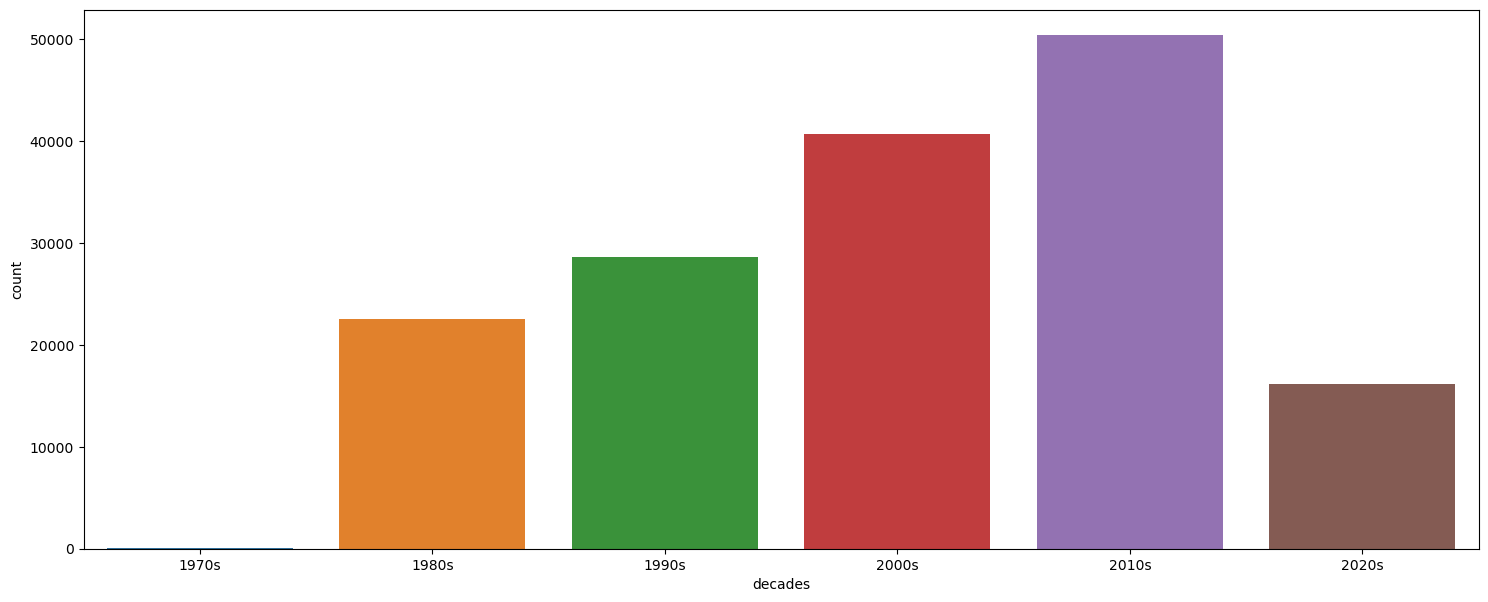

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

fig, ax =  plt.subplots(figsize=(18,7))
sns.countplot(x=incidence_df['decades'])

plt.show()

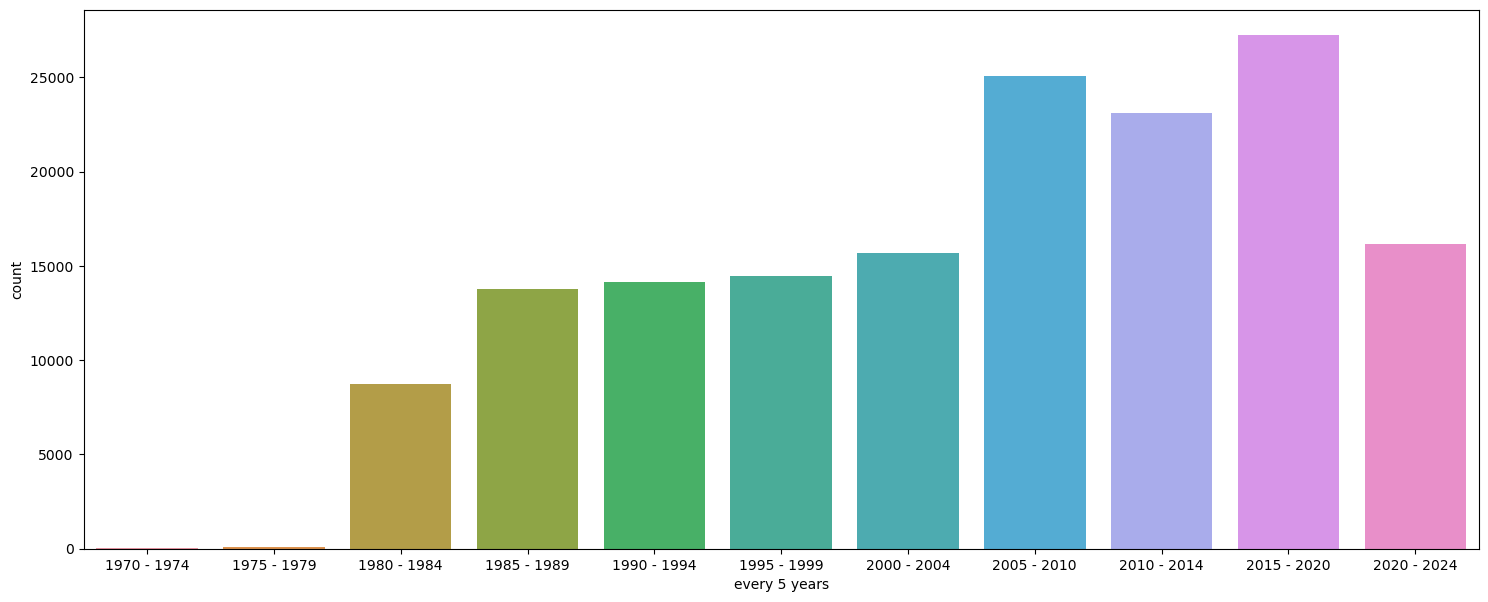

In [26]:
fig, ax =  plt.subplots(figsize=(18,7))
sns.countplot(x=incidence_df['every 5 years'])

plt.show()

#### Se puede inferir del gráfico de barras que la frecuencia de eventos sísmicos ha incrementado con mayor frecuencia los últimos 20 años.

/var/folders/gl/84jc1sz53xb635kmrzj5rgc80000gn/T/ipykernel_4410/810904991.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


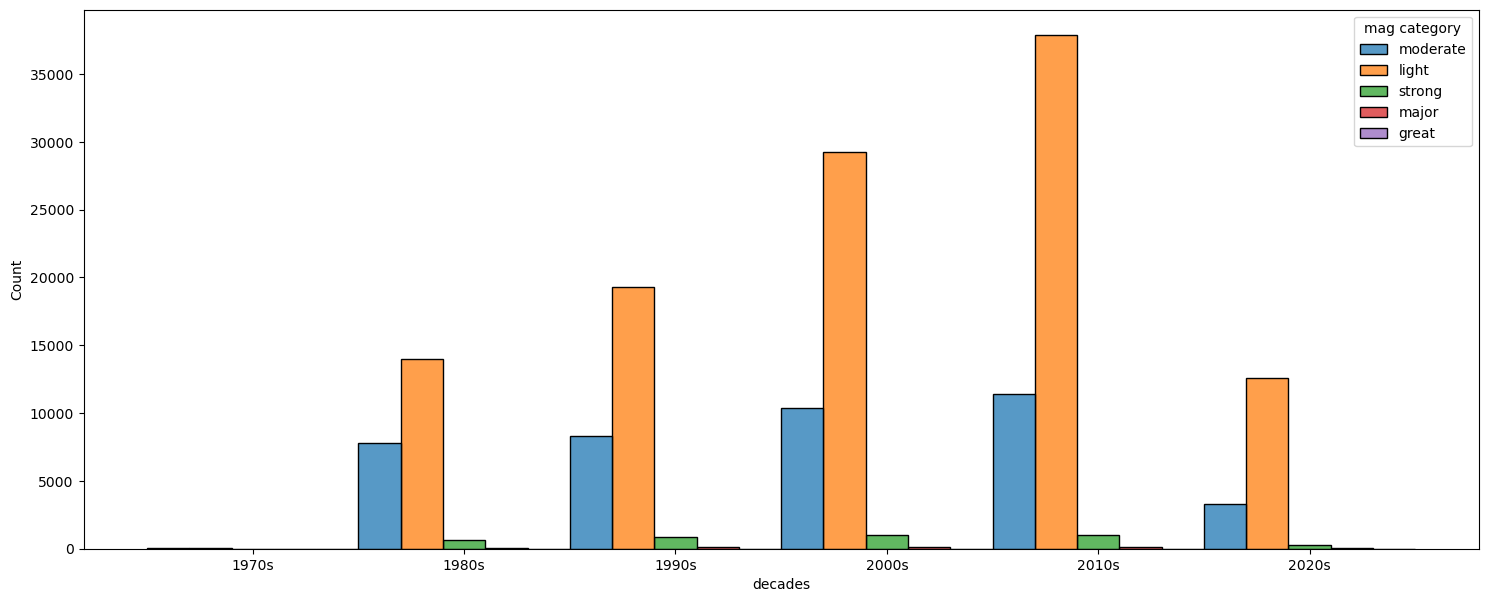

In [27]:
fig, ax = plt.subplots(figsize=(18,7))
sns.histplot(binwidth=0.2, x='decades',hue='mag category', data=incidence_df, stat='count', multiple='dodge')
fig.show()

/var/folders/gl/84jc1sz53xb635kmrzj5rgc80000gn/T/ipykernel_4410/849357867.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


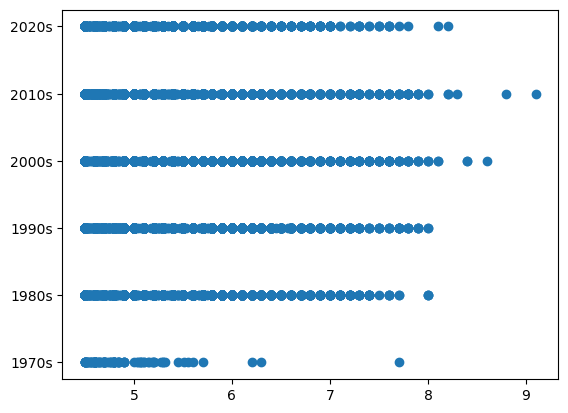

In [28]:
fig, ax = plt.subplots()

ax.scatter(incidence_df['mag'], incidence_df['decades'])
fig.show()

#### En el segundo gráfico y tercer gráfico se puede ver una cierta relación entre mayores magnitudes y el paso del tiempo, existiendo valores 'outliers' con magnitudes entre 8.0 y 9.0. Sin embargo, las escalas de medición no son la misma para todos los valores.

/var/folders/gl/84jc1sz53xb635kmrzj5rgc80000gn/T/ipykernel_4410/367400574.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


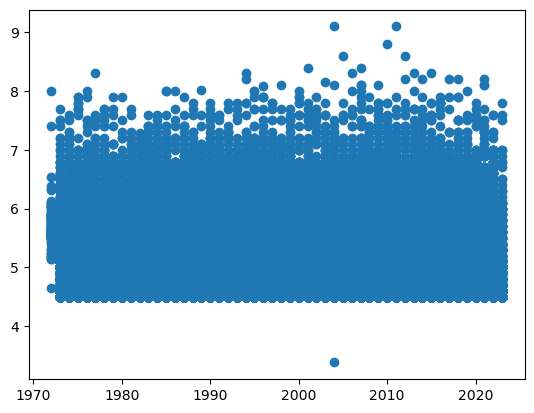

In [29]:
fig, ax = plt.subplots()

ax.scatter(country_incidence_df['year'], country_incidence_df['mag'])
fig.show()

#### Los eventos de mayor magnitud se visualizan entre los años 2000s y 2010s.

/var/folders/gl/84jc1sz53xb635kmrzj5rgc80000gn/T/ipykernel_4410/2792762042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


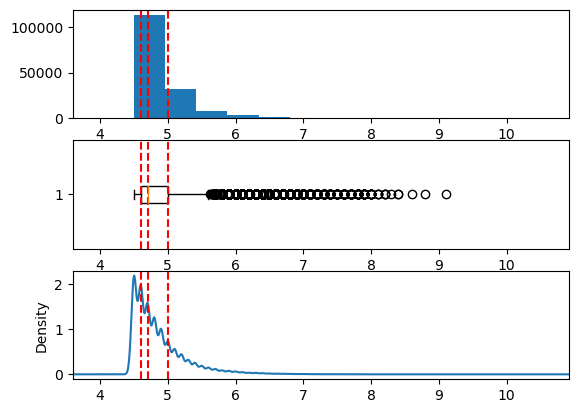

In [30]:

def plot(incidence_df,filter=None, var='year'):
    fig, ax = plt.subplots(nrows=3, ncols=1)
    min_ = (incidence_df[var]).min()*0.8
    max_ = (incidence_df[var]).max()*1.2
    
    if filter:
        incidence_df = incidence_df[incidence_df['decades']==filter]
        
    ax[0].hist(np.array(incidence_df[var]))
    ax[0].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[0].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[0].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    ax[0].set_xlim(min_,max_)
    ax[1].boxplot(np.array(incidence_df[var]),vert=False)
    ax[1].set_xlim(min_,max_)
    ax[1].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[1].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[1].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    incidence_df[var].plot(kind='density')
    ax[2].set_xlim(min_,max_)
    ax[2].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[2].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[2].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    fig.show()

plot(incidence_df, var='mag')

/var/folders/gl/84jc1sz53xb635kmrzj5rgc80000gn/T/ipykernel_4410/2792762042.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


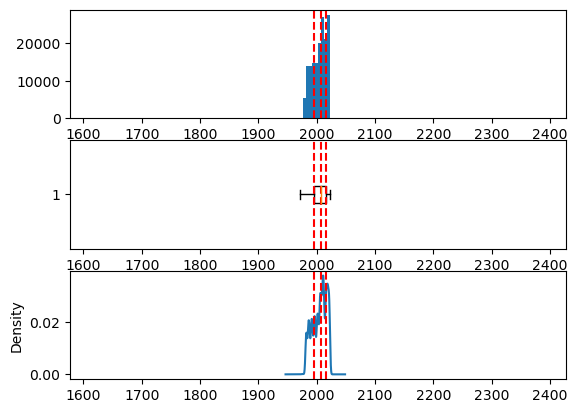

In [31]:
def plotHist(incidence_df, var=''):
    fig, ax = plt.subplots(nrows=3, ncols=1)
    min_ = (incidence_df[var]).min()*0.8
    max_ = (incidence_df[var]).max()*1.2
        
    ax[0].hist(np.array(incidence_df[var]))
    ax[0].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[0].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[0].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    ax[0].set_xlim(min_,max_)
    ax[1].boxplot(np.array(incidence_df[var]),vert=False)
    ax[1].set_xlim(min_,max_)
    ax[1].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[1].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[1].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    incidence_df[var].plot(kind='density')
    ax[2].set_xlim(min_,max_)
    ax[2].axvline(x = incidence_df[var].quantile(0.25), color = 'red',linestyle='dashed')
    ax[2].axvline(x = incidence_df[var].quantile(0.5), color = 'red',linestyle='dashed')
    ax[2].axvline(x = incidence_df[var].quantile(0.75), color = 'red',linestyle='dashed')
    fig.show()

plot(incidence_df,var='year')

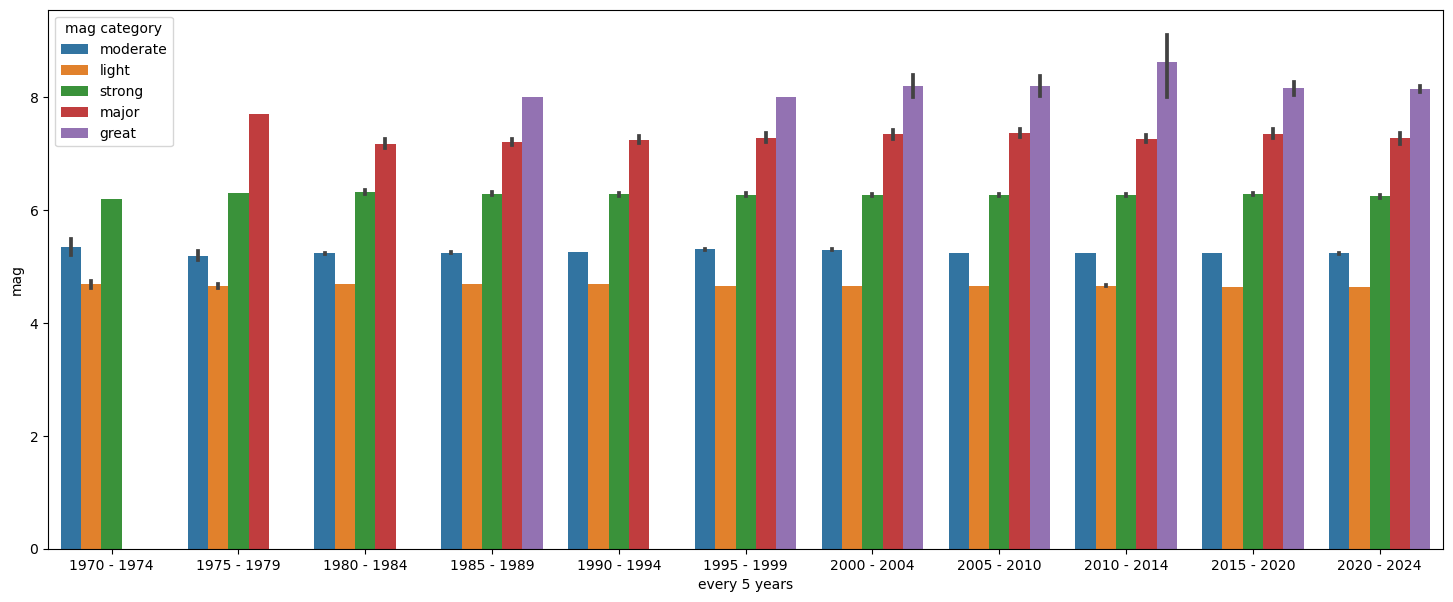

In [32]:
fig, ax = plt.subplots(figsize=(18,7))

sns.barplot(x=incidence_df['every 5 years'],y=incidence_df['mag'], hue=incidence_df['mag category'])
plt.show()

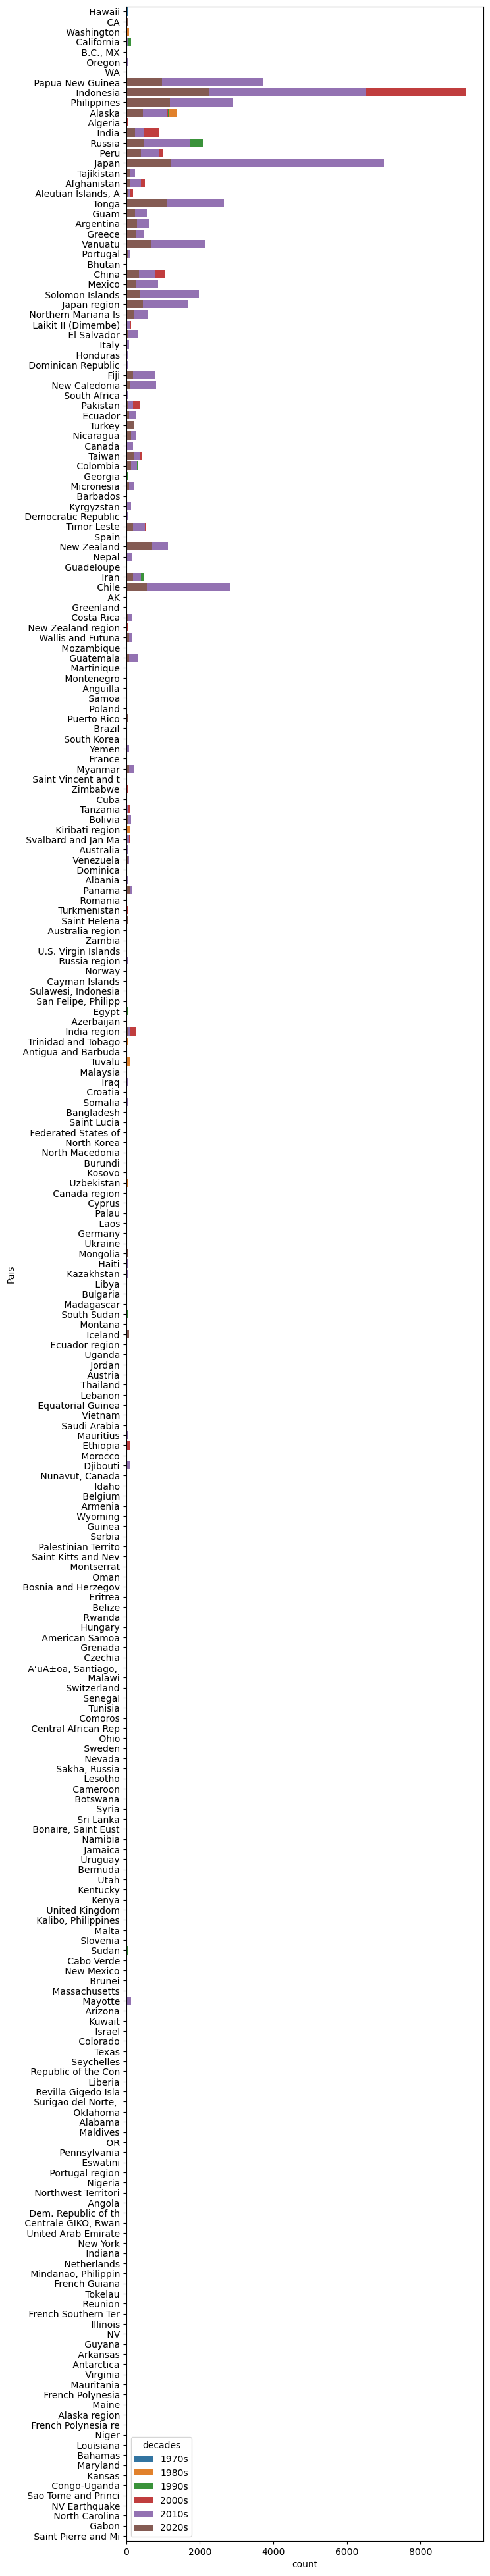

In [33]:
fig, ax = plt.subplots(figsize=(7,50))

sns.countplot(y=incidence_df['Pais'], hue=incidence_df['decades'], dodge=False)

plt.show()

#### Se evidencia una relación positiva en los países con mayor incidencia de eventos sísmicos, especialmente en las últimas 2 décadas, siendo su distribución entre los 4.5 y 5.0 grados de magnitud.

In [44]:
#moon_data_df['Year'].info()

earthquakes_clean_df.info()

earthquakes_data_df = earthquakes_clean_df.copy()

earthquakes_data_df.drop(columns=[''])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265853 entries, 0 to 265852
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           265853 non-null  object 
 1   year           265853 non-null  int64  
 2   month          265853 non-null  int64  
 3   day            265853 non-null  int64  
 4   latitude       265853 non-null  float64
 5   longitude      265853 non-null  float64
 6   depth          265851 non-null  float64
 7   mag            265853 non-null  float64
 8   magType        265852 non-null  object 
 9   rms            234158 non-null  float64
 10  net            265853 non-null  object 
 11  id             265853 non-null  object 
 12  updated        265853 non-null  object 
 13  place          265098 non-null  object 
 14  Pais           210033 non-null  object 
 15  decades        265853 non-null  object 
 16  every 5 years  231740 non-null  object 
dtypes: float64(5), int64(3), obje